In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("D://ds data//heat_failure.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


In [6]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [7]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [8]:
a=[]
for i in df["age"]:
    i =int(i)
    a.append(i)
print(a)
   

[75, 55, 65, 50, 65, 90, 75, 60, 65, 80, 75, 62, 45, 50, 49, 82, 87, 45, 70, 48, 65, 65, 68, 53, 75, 80, 95, 70, 58, 82, 94, 85, 50, 50, 65, 69, 90, 82, 60, 60, 70, 50, 70, 72, 60, 50, 51, 60, 80, 57, 68, 53, 60, 70, 60, 95, 70, 60, 49, 72, 45, 50, 55, 45, 45, 60, 42, 72, 70, 65, 41, 58, 85, 65, 69, 60, 70, 42, 75, 55, 70, 67, 60, 79, 59, 51, 55, 65, 44, 57, 70, 60, 42, 60, 58, 58, 63, 70, 60, 63, 65, 75, 80, 42, 60, 72, 55, 45, 63, 45, 85, 55, 50, 70, 60, 58, 60, 85, 65, 86, 60, 66, 60, 60, 60, 43, 46, 58, 61, 53, 53, 60, 46, 63, 81, 75, 65, 68, 62, 50, 80, 46, 50, 61, 72, 50, 52, 64, 75, 60, 72, 62, 50, 50, 65, 60, 52, 50, 85, 59, 66, 45, 63, 50, 45, 80, 53, 59, 65, 70, 51, 52, 70, 50, 65, 60, 69, 49, 63, 55, 40, 59, 65, 75, 58, 60, 50, 60, 60, 40, 80, 64, 50, 73, 45, 77, 45, 65, 50, 60, 63, 45, 70, 60, 78, 50, 40, 85, 60, 49, 70, 50, 78, 48, 65, 73, 70, 54, 68, 55, 73, 65, 42, 47, 58, 75, 58, 55, 65, 72, 60, 70, 40, 53, 53, 77, 75, 70, 65, 55, 70, 65, 40, 73, 54, 61, 55, 64, 40, 53,

In [9]:
df["age"] = a

In [10]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [11]:
import matplotlib.pyplot as plt

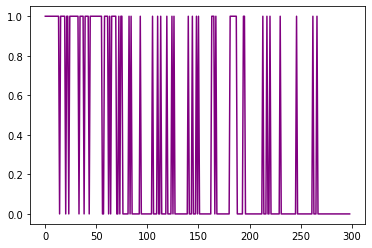

In [12]:
plt.plot(df.DEATH_EVENT,color="purple")

In [13]:
dir(plt)

['Annotation',
 'Arrow',
 'Artist',
 'AutoLocator',
 'Axes',
 'Button',
 'Circle',
 'Figure',
 'FigureCanvasBase',
 'FixedFormatter',
 'FixedLocator',
 'FormatStrFormatter',
 'Formatter',
 'FuncFormatter',
 'GridSpec',
 'IndexLocator',
 'Line2D',
 'LinearLocator',
 'Locator',
 'LogFormatter',
 'LogFormatterExponent',
 'LogFormatterMathtext',
 'LogLocator',
 'MaxNLocator',
 'MouseButton',
 'MultipleLocator',
 'Normalize',
 'NullFormatter',
 'NullLocator',
 'Number',
 'PolarAxes',
 'Polygon',
 'Rectangle',
 'ScalarFormatter',
 'Slider',
 'Subplot',
 'SubplotTool',
 'Text',
 'TickHelper',
 'Widget',
 '_INSTALL_FIG_OBSERVER',
 '_IP_REGISTERED',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_auto_draw_if_interactive',
 '_backend_mod',
 '_code_objs',
 '_copy_docstring_and_deprecators',
 '_get_required_interactive_framework',
 '_interactive_bk',
 '_log',
 '_pylab_helpers',
 '_setup_pyplot_info_docstrings',
 '_warn_if_gui_ou

{'whiskers': [<matplotlib.lines.Line2D at 0x1492d1bc7c8>,
 'caps': [<matplotlib.lines.Line2D at 0x1492d1dcb88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1492d1db288>],
 'medians': [<matplotlib.lines.Line2D at 0x1492d1dcc88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1492d1e7bc8>],
 'means': []}

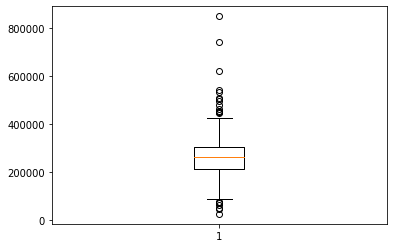

In [14]:
plt.boxplot(df.platelets)

In [15]:
import seaborn as sns

Text(0.5, 0, 'platelets')

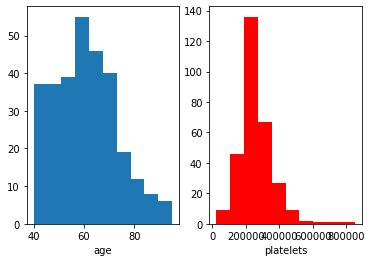

In [16]:
plt.subplot(1,2,1)
plt.hist(df.age)
plt.xlabel("age")
plt.subplot(1,2,2)
plt.hist(df.platelets,color="r")
plt.xlabel("platelets")

<BarContainer object of 299 artists>

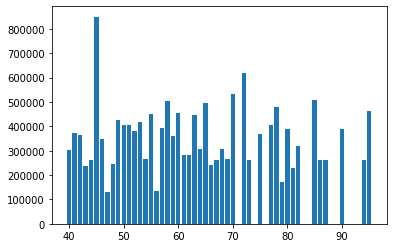

In [17]:
plt.bar(df.age,df.platelets)

In [18]:
df["age"] = a

In [19]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = MinMaxScaler()
scaler.fit(df[["platelets"]])
df["platelets"] = scaler.transform(df[["platelets"]])

In [22]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,0.290823,1.9,130,1,0,4,1
1,55,0,7861,0,38,0,0.288833,1.1,136,1,0,6,1
2,65,0,146,0,20,0,0.165960,1.3,129,1,1,7,1
3,50,1,111,0,20,0,0.224148,1.9,137,1,0,7,1
4,65,1,160,1,20,0,0.365984,2.7,116,0,0,8,1


Text(0, 0.5, 'platelets')

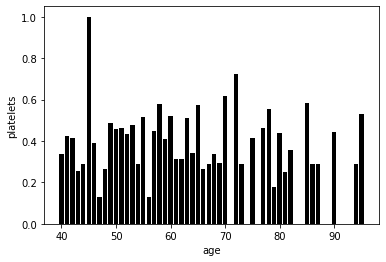

In [23]:
plt.bar(df.age,df.platelets,color="black")
plt.xlabel("age")
plt.ylabel("platelets")


In [24]:
scaler1 = MinMaxScaler()
scaler1.fit(df[["creatinine_phosphokinase"]])
df["creatinine_phosphokinase"] = scaler.transform(df[["creatinine_phosphokinase"]])

In [25]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,-0.029722,0,20,1,0.290823,1.9,130,1,0,4,1
1,55,0,-0.020898,0,38,0,0.288833,1.1,136,1,0,6,1
2,65,0,-0.030251,0,20,0,0.165960,1.3,129,1,1,7,1
3,50,1,-0.030293,0,20,0,0.224148,1.9,137,1,0,7,1
4,65,1,-0.030234,1,20,0,0.365984,2.7,116,0,0,8,1


(array([252.,  21.,  13.,   6.,   0.,   3.,   1.,   1.,   0.,   2.]),
 array([-0.03040005, -0.02944987, -0.0284997 , -0.02754952, -0.02659935,
        -0.02564917, -0.02469899, -0.02374882, -0.02279864, -0.02184847,
        -0.02089829]),
 <BarContainer object of 10 artists>)

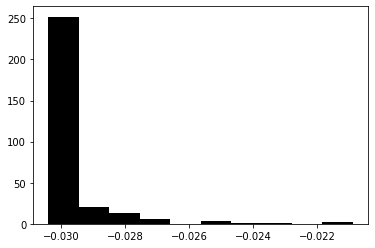

In [26]:
plt.hist(df.creatinine_phosphokinase,color="black")

(array([  2.,   0.,   1.,   3.,  16.,  29., 126.,  80.,  31.,  11.]),
 array([113. , 116.5, 120. , 123.5, 127. , 130.5, 134. , 137.5, 141. ,
        144.5, 148. ]),
 <BarContainer object of 10 artists>)

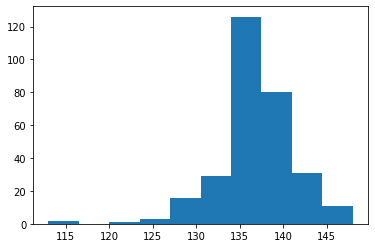

In [27]:
plt.hist(df.serum_sodium)

In [28]:
scaler2 = MinMaxScaler()
scaler2.fit(df[["serum_sodium"]])
df["serum_sodium"] = scaler2.transform(df[["serum_sodium"]])

In [29]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,-0.029722,0,20,1,0.290823,1.9,0.485714,1,0,4,1
1,55,0,-0.020898,0,38,0,0.288833,1.1,0.657143,1,0,6,1
2,65,0,-0.030251,0,20,0,0.165960,1.3,0.457143,1,1,7,1
3,50,1,-0.030293,0,20,0,0.224148,1.9,0.685714,1,0,7,1
4,65,1,-0.030234,1,20,0,0.365984,2.7,0.085714,0,0,8,1


(array([ 2.,  0.,  1.,  6., 13., 61., 94., 92., 19., 11.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

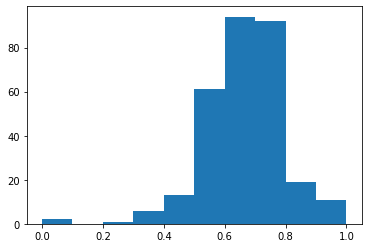

In [30]:
plt.hist(df.serum_sodium)

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [32]:
lr = LogisticRegression()
dtc = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [33]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,-0.029722,0,20,1,0.290823,1.9,0.485714,1,0,4,1
1,55,0,-0.020898,0,38,0,0.288833,1.1,0.657143,1,0,6,1
2,65,0,-0.030251,0,20,0,0.165960,1.3,0.457143,1,1,7,1
3,50,1,-0.030293,0,20,0,0.224148,1.9,0.685714,1,0,7,1
4,65,1,-0.030234,1,20,0,0.365984,2.7,0.085714,0,0,8,1


In [34]:
x = df.drop(columns=["DEATH_EVENT"],axis=1)
x.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75,0,-0.029722,0,20,1,0.290823,1.9,0.485714,1,0,4
1,55,0,-0.020898,0,38,0,0.288833,1.1,0.657143,1,0,6
2,65,0,-0.030251,0,20,0,0.165960,1.3,0.457143,1,1,7
3,50,1,-0.030293,0,20,0,0.224148,1.9,0.685714,1,0,7
4,65,1,-0.030234,1,20,0,0.365984,2.7,0.085714,0,0,8


In [35]:
y = df.DEATH_EVENT
y.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [37]:
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

C:\Users\Amit chauhan\.conda\envs\tfp\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7833333333333333

In [38]:
y_pred = lr.predict(x_test)

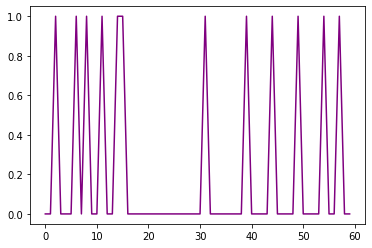

In [39]:
plt.plot(y_pred,color="purple")

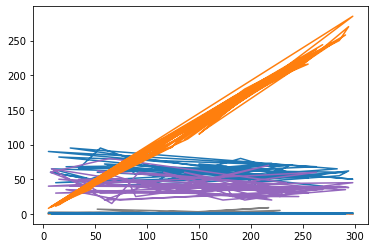

In [40]:
plt.plot(x_test)

In [41]:
dtc.fit(x_train,y_train)
dtc.score(x_test,y_test)
y_pred1 = dtc.predict(x_test)

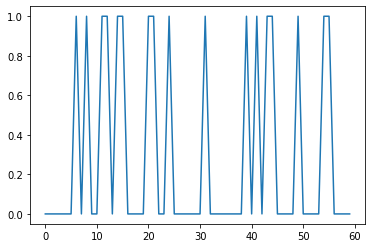

In [42]:
plt.plot(y_pred1)

In [43]:
rf.fit(x_train,y_train)
print(rf.score(x_test,y_test))
y_pred2 = rf.predict(x_test)

0.85


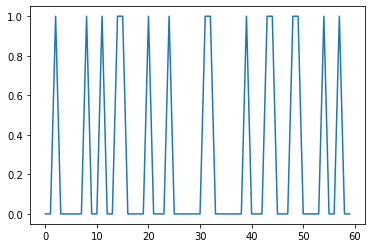

In [44]:
plt.plot(y_pred2)

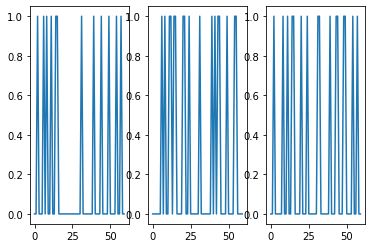

In [45]:
plt.subplot(1,3,1)
plt.plot(y_pred)
plt.subplot(1,3,2)
plt.plot(y_pred1)
plt.subplot(1,3,3)
plt.plot(y_pred2)

In [46]:
from sklearn.model_selection import cross_val_score

In [47]:
c1 = cross_val_score(lr,x_train,y_train,cv=10)
c1

C:\Users\Amit chauhan\.conda\envs\tfp\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Amit chauhan\.conda\envs\tfp\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/line

array([0.83333333, 0.83333333, 0.875     , 0.83333333, 0.875     ,
       0.83333333, 0.79166667, 0.875     , 0.75      , 0.86956522])

mean== 0.8369565217391305
std== 0.03882056590138804


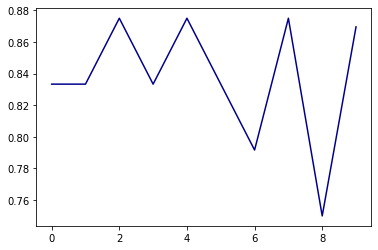

In [48]:
plt.plot(c1,color="darkblue")
print("mean==",c1.mean())
print("std==",c1.std())

In [49]:
c2 = cross_val_score(dtc,x_train,y_train,cv=10)
c2

array([0.70833333, 0.75      , 0.83333333, 0.79166667, 0.79166667,
       0.75      , 0.75      , 0.875     , 0.79166667, 0.82608696])

mean== 0.7867753623188406
std== 0.04666780593172332


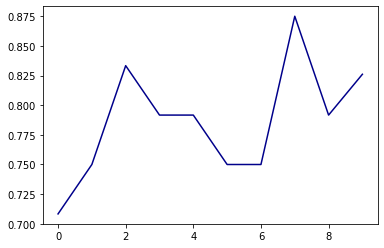

In [50]:
plt.plot(c2,color="darkblue")
print("mean==",c2.mean())
print("std==",c2.std())

In [51]:
c3 = cross_val_score(rf,x_train,y_train,cv=10)
c3

array([0.875     , 0.875     , 0.79166667, 0.91666667, 0.79166667,
       0.91666667, 0.83333333, 0.83333333, 0.75      , 0.86956522])

mean== 0.8452898550724637
std== 0.05259367174783012


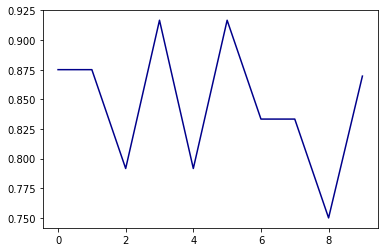

In [52]:
plt.plot(c3,color="darkblue")
print("mean==",c3.mean())
print("std==",c3.std())